#Importing Libraries and Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#data manipulation
import numpy as np
import pandas as pd
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
reviews=pd.read_csv('/content/drive/MyDrive/Project DC/playstorescrapping.csv')
payment_apps=pd.read_csv('/content/drive/MyDrive/Project DC/payment apps.csv')
reviews.head()

,content,thumbsUpCount,score,at,app
0,"Worst service, paid bill and app deducted plat...",1,1,2022-07-17 12:56:14,Paytm: Secure UPI Payments
1,Paytm wallet frozen. I have added money to it ...,0,1,2022-07-17 12:10:49,Paytm: Secure UPI Payments
2,Psytm is doing fraud with the customer. They t...,0,1,2022-07-17 11:16:07,Paytm: Secure UPI Payments
3,It's a very good app for paying bills but rece...,2,2,2022-07-17 09:45:58,Paytm: Secure UPI Payments
4,Everything is good about the app but have one ...,0,5,2022-07-17 07:57:17,Paytm: Secure UPI Payments


In [4]:
payment_apps

,Appname,Overall rating,Total Number of Reviews,Downloads,age
0,muvin: Teenagers Payment App,4.4,981,100K+,Rated for 3+
1,Ola Money - Wallet payments,2.6,30.3K,1M+,Rated for 3+
2,Samsung Wallet (Samsung Pay),4.3,1.1M,100M+,Rated for 3+
3,postpe - shop now pay later,4.6,126K,1M+,Rated for 3+
4,Google Pay: Secure UPI payment,4.3,8.27M,500M+,Rated for 3+
5,"PhonePe UPI, Payment, Recharge",4.4,8.62M,100M+,Rated for 3+
6,BHIM SBI Pay:Retail & Business,4.3,437K,10M+,Rated for 3+
7,"Yuva Pay:UPI, Wallet, Payments",4.0,4.05K,100K+,Rated for 3+
8,iMobile Pay by ICICI Bank,4.4,3.31M,10M+,Rated for 3+
9,CRED: Credit Card Bills & More,4.8,1.11M,10M+,Rated for 3+


In [5]:
len(reviews)

30001

# Data Preprocessing

In [6]:
for i in payment_apps.index:
  payment_apps.loc[i,'Downloads'] = payment_apps.loc[i,'Downloads'][:-1]

payment_apps.head()

,Appname,Overall rating,Total Number of Reviews,Downloads,age
0,muvin: Teenagers Payment App,4.4,981,100K,Rated for 3+
1,Ola Money - Wallet payments,2.6,30.3K,1M,Rated for 3+
2,Samsung Wallet (Samsung Pay),4.3,1.1M,100M,Rated for 3+
3,postpe - shop now pay later,4.6,126K,1M,Rated for 3+
4,Google Pay: Secure UPI payment,4.3,8.27M,500M,Rated for 3+


In [7]:
payment_apps.columns = ['Appname','Rating','Reviews','Downloads','Age']
payment_apps.head()

,Appname,Rating,Reviews,Downloads,Age
0,muvin: Teenagers Payment App,4.4,981,100K,Rated for 3+
1,Ola Money - Wallet payments,2.6,30.3K,1M,Rated for 3+
2,Samsung Wallet (Samsung Pay),4.3,1.1M,100M,Rated for 3+
3,postpe - shop now pay later,4.6,126K,1M,Rated for 3+
4,Google Pay: Secure UPI payment,4.3,8.27M,500M,Rated for 3+


In [8]:
payment_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Appname    30 non-null     object 
 1   Rating     30 non-null     float64
 2   Reviews    30 non-null     object 
 3   Downloads  30 non-null     object 
 4   Age        30 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [9]:
payment_apps['Downloads']=payment_apps['Downloads'].str.replace('M','000000')
payment_apps['Downloads']=payment_apps['Downloads'].str.replace('K','000')
payment_apps['Downloads'] = pd.to_numeric(payment_apps['Downloads'])
payment_apps.head()

,Appname,Rating,Reviews,Downloads,Age
0,muvin: Teenagers Payment App,4.4,981,100000,Rated for 3+
1,Ola Money - Wallet payments,2.6,30.3K,1000000,Rated for 3+
2,Samsung Wallet (Samsung Pay),4.3,1.1M,100000000,Rated for 3+
3,postpe - shop now pay later,4.6,126K,1000000,Rated for 3+
4,Google Pay: Secure UPI payment,4.3,8.27M,500000000,Rated for 3+


In [10]:

payment_apps['Reviews'] = payment_apps.Reviews.apply(lambda x: x.replace('M', 'e+6'))
payment_apps['Reviews'] = payment_apps.Reviews.apply(lambda x: x.replace('K', 'e+3'))

payment_apps['Reviews'] = pd.to_numeric(payment_apps['Reviews'])


payment_apps.head()

,Appname,Rating,Reviews,Downloads,Age
0,muvin: Teenagers Payment App,4.4,981.0,100000,Rated for 3+
1,Ola Money - Wallet payments,2.6,30300.0,1000000,Rated for 3+
2,Samsung Wallet (Samsung Pay),4.3,1100000.0,100000000,Rated for 3+
3,postpe - shop now pay later,4.6,126000.0,1000000,Rated for 3+
4,Google Pay: Secure UPI payment,4.3,8270000.0,500000000,Rated for 3+


# EDA

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        30001 non-null  object
 1   thumbsUpCount  30001 non-null  int64 
 2   score          30001 non-null  int64 
 3   at             30001 non-null  object
 4   app            30001 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

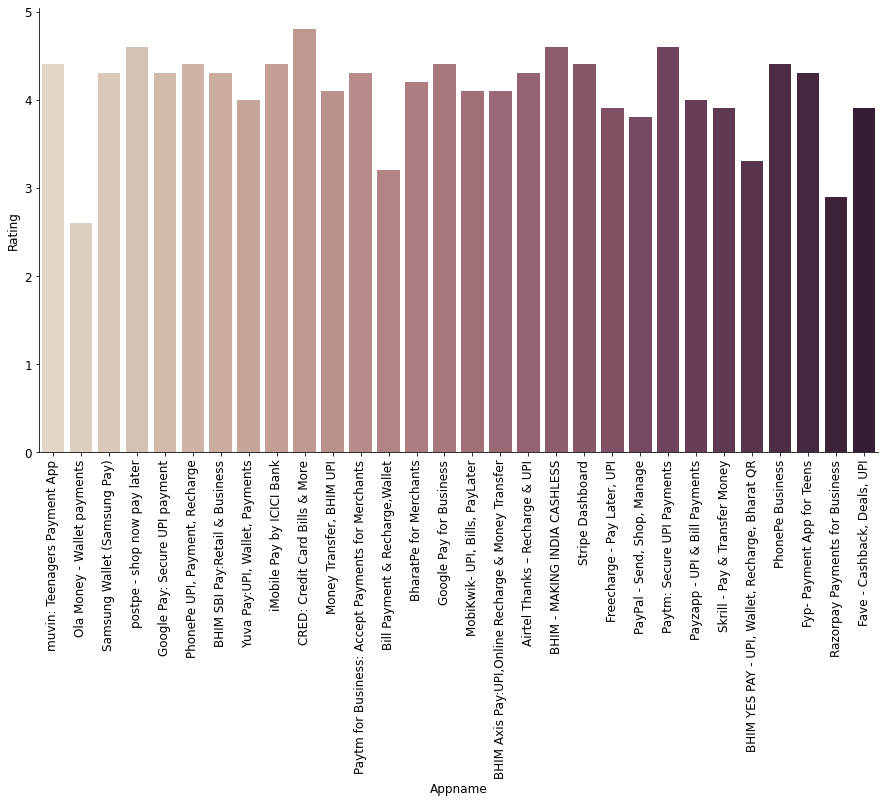

In [12]:
sns.catplot(data=payment_apps,x="Appname",y="Rating",kind="bar",palette="ch:.25",height=7,size=7,aspect=2 )
plt.xticks(rotation = 90)

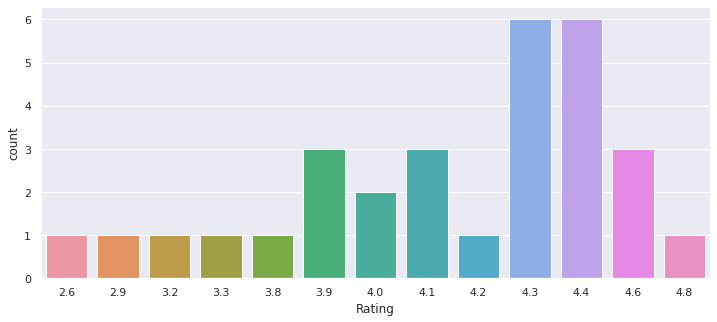

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(data=payment_apps,x='Rating')


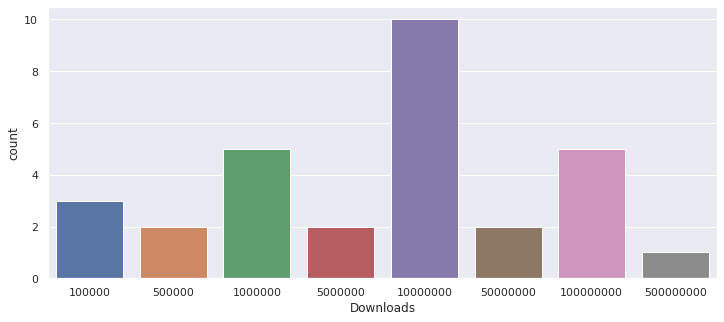

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(data=payment_apps,x='Downloads')

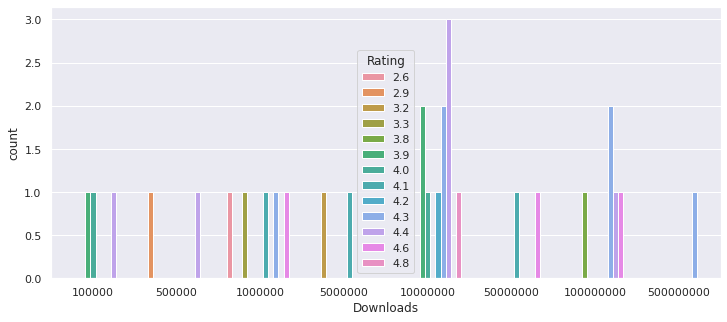

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(data=payment_apps,x='Downloads',hue='Rating')

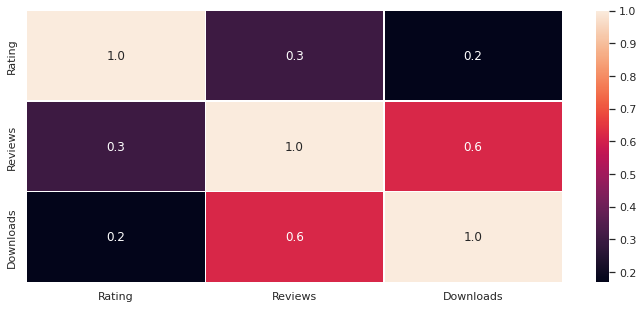

In [16]:

sns.heatmap(payment_apps.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

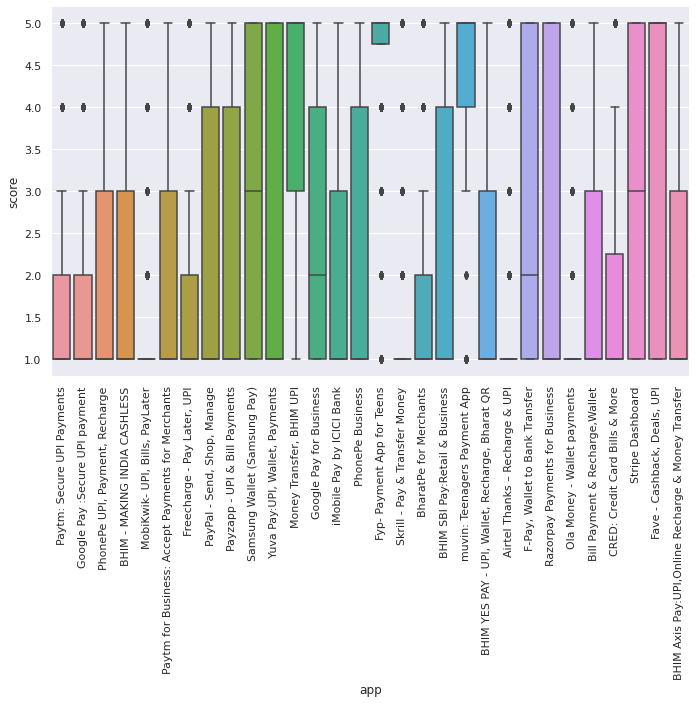

In [17]:
sns.catplot(kind="box",data=reviews,x='app',y='score',height=6,size=6,aspect=2)
plt.xticks(rotation=90)